# Capstone #1

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt, timedelta
import matplotlib.pyplot as plt
import random as rd
import scipy.stats as stats

# Data Input

In [258]:
in_folder = 'Kaggle/'
age_gender = pd.read_csv(in_folder + 'age_gender_bkts.csv')
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [259]:
countries = pd.read_csv(in_folder + 'countries.csv')
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [260]:
sessions = pd.read_csv(in_folder + 'sessions.csv')
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [261]:
test_users = pd.read_csv(in_folder + 'test_users.csv')
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [262]:
train_users = pd.read_csv(in_folder + 'train_users_2.csv',parse_dates=True)
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# Data Assessment and Cleaning

In [263]:
sessions.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [264]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [265]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [266]:
train_users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


<div class="span5 alert alert-success">
<p> Things of note:
    
- In train_users, we see that the date_first_booking column is composed of roughly 2/3 null entries, which corresponds with the users that never made a booking. 

- About half of the "age" entries are null, and there are some false entries as well (the minimum and maximum age is 1 and 2014, respectively).

- The timestamp_first_active column is integer type, which needs to be set to datetime format.</p>
</div>

In [267]:
# Create datetime columns when possible
train_users['timestamp_first_active'] = pd.to_datetime(train_users.timestamp_first_active.astype(str) ,format='%Y%m%d%H%M%S')
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'],format='%Y-%m-%d')
train_users['date_first_booking'] = pd.to_datetime(train_users['date_first_booking'],format='%Y-%m-%d')

In [268]:
# Assess the outliers in the age colume
train_users.age[(train_users.age >100) | (train_users.age < 10)].value_counts()

105.0     1131
2014.0     710
110.0      196
104.0       48
5.0         45
2013.0      39
102.0       34
109.0       31
103.0       26
107.0       23
101.0       23
106.0       17
108.0       15
115.0       13
2.0          7
113.0        4
1931.0       3
1932.0       3
4.0          3
1949.0       3
1929.0       2
1.0          2
111.0        2
1947.0       2
1936.0       2
1928.0       2
1924.0       2
112.0        1
1942.0       1
132.0        1
1927.0       1
1953.0       1
1938.0       1
150.0        1
1935.0       1
1952.0       1
1995.0       1
1925.0       1
1933.0       1
1926.0       1
2008.0       1
Name: age, dtype: int64

<div class="span5 alert alert-success">
<p> There are oddly high number of ages at 105, 2014, and 110. For now, let's set the ages above 100 or below 10 to NaN.</p>
</div>

In [269]:
# Set extreme age values to NaN
train_users.loc[train_users.age > 100,'age'] = np.NaN
train_users.loc[train_users.age < 10,'age'] = np.NaN

Text(0.5,0,'Age [years]')

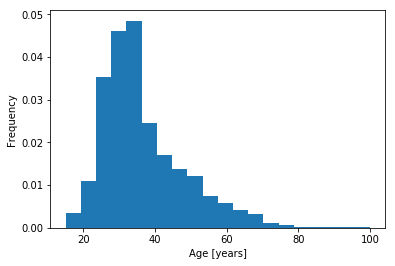

In [270]:
# Histogram of train_users.age. It is slightly skew right.
train_users.age.plot(kind='hist',bins=20,density=True)
plt.xlabel('Age [years]')

In [271]:
# Now the numbers look better.
train_users.age.describe()

count    123059.000000
mean         36.559211
std          11.690611
min          15.000000
25%          28.000000
50%          34.000000
75%          42.000000
max         100.000000
Name: age, dtype: float64

In [272]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


<div class="span5 alert alert-success">
<p> We can group by specific columns to get a gauge for their effect on "age" and "signup_flow."</p>
</div>

In [273]:
train_users.groupby('gender').describe()

age                                                       \
             count       mean        std   min   25%   50%   75%    max   
gender                                                                    
-unknown-  16124.0  36.939655  12.083221  15.0  29.0  34.0  43.0  100.0   
FEMALE     56741.0  36.236936  11.854297  15.0  28.0  33.0  42.0  100.0   
MALE       49969.0  36.800917  11.363991  15.0  29.0  34.0  42.0  100.0   
OTHER        225.0  36.888889  10.969565  17.0  29.0  35.0  44.0   78.0   

          signup_flow                                                 
                count      mean       std  min  25%  50%   75%   max  
gender                                                                
-unknown-     95688.0  4.183607  8.814782  0.0  0.0  0.0  0.00  25.0  
FEMALE        63041.0  2.359845  6.281494  0.0  0.0  0.0  0.00  25.0  
MALE          54440.0  2.712987  6.596060  0.0  0.0  0.0  0.00  25.0  
OTHER           282.0  2.283688  6.377592  0.0  0.0  0.0  0.75  25.0

In [274]:
train_users.groupby('signup_method').describe()

age                                                       \
                 count       mean        std   min   25%   50%   75%    max   
signup_method                                                                 
basic          65618.0  37.146393  12.010220  15.0  29.0  34.0  43.0  100.0   
facebook       57300.0  35.891012  11.276872  15.0  28.0  33.0  41.0  100.0   
google           141.0  34.843972  11.408821  18.0  27.0  32.0  39.0   99.0   

              signup_flow                                                     
                    count       mean       std   min   25%   50%   75%   max  
signup_method                                                                 
basic            152897.0   3.513136  8.176960   0.0   0.0   0.0   0.0  25.0  
facebook          60008.0   2.561775  5.982584   0.0   0.0   0.0   0.0  25.0  
google              546.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0

<div class="span5 alert alert-success">
<p> Between "basic" and "facebook" signup_methods, there is a 1.7 year age difference as well as a slight difference in mean signup_flow.</p>
</div>

In [275]:
train_users.groupby('language').describe()

age                                                         \
             count       mean        std   min    25%   50%    75%    max   
language                                                                    
ca             4.0  32.500000   6.137318  25.0  30.25  32.5  34.75   40.0   
cs            18.0  31.611111  13.284838  17.0  25.00  26.0  34.75   69.0   
da            33.0  33.151515   9.031615  18.0  26.00  33.0  40.00   51.0   
de           410.0  32.148780  10.344190  16.0  25.00  29.0  37.00   87.0   
el            22.0  34.227273   9.626015  21.0  29.25  33.5  36.50   66.0   
en        118590.0  36.708061  11.681182  15.0  28.00  34.0  42.00  100.0   
es           633.0  34.630332  12.225951  17.0  26.00  32.0  40.00   98.0   
fi            11.0  29.909091   5.957425  23.0  25.00  28.0  35.00   41.0   
fr           811.0  31.388409  11.486689  15.0  24.00  28.0  35.00   95.0   
hr             2.0  23.500000   7.778175  18.0  20.75  23.5  26.25   29.0   
hu            15.0  35.133333  12.665288  22.0  27.00  29.0  37.50   67.0   
id            17.0  28.117647   6.927142  19.0  22.00  30.0  32.00   39.0   
is             4.0  39.000000   6.733003  31.0  35.50  39.0  42.50   47.0   
it           361.0  33.157895  12.935739  16.0  25.00  30.0  39.00   96.0   
ja           128.0  35.976562  10.743586  18.0  27.00  34.5  43.00   66.0   
ko           397.0  33.785894  10.937933  17.0  26.00  31.0  39.00   96.0   
nl            53.0  35.075472  11.483850  18.0  26.00  31.0  42.00   66.0   
no            20.0  29.300000   7.934601  19.0  24.00  27.0  34.00   49.0   
pl            42.0  28.095238   9.598805  17.0  21.25  26.0  33.00   55.0   
pt           170.0  32.547059  10.153299  16.0  26.00  31.0  35.00   65.0   
ru           269.0  32.237918  10.875958  16.0  25.00  29.0  37.00   75.0   
sv            78.0  30.679487   9.064693  21.0  24.00  27.0  35.00   57.0   
th            18.0  36.333333  13.521225  16.0  28.00  33.0  45.25   67.0   
tr            45.0  32.533333  11.300845  20.0  26.00  29.0  33.00   75.0   
zh           908.0  31.675110  10.513139  17.0  25.00  28.0  36.00   95.0   

         signup_flow                                                  
               count      mean        std  min  25%  50%   75%   max  
language                                                              
ca               5.0  5.000000  11.180340  0.0  0.0  0.0  0.00  25.0  
cs              32.0  1.906250   5.508699  0.0  0.0  0.0  0.00  25.0  
da              58.0  5.086207   9.334495  0.0  0.0  0.0  2.75  25.0  
de             732.0  2.435792   6.480950  0.0  0.0  0.0  0.00  25.0  
el              24.0  4.208333   8.592105  0.0  0.0  0.0  0.75  25.0  
en          206314.0  3.271979   7.644901  0.0  0.0  0.0  0.00  25.0  
es             915.0  3.168306   7.441830  0.0  0.0  0.0  0.00  25.0  
fi              14.0  2.142857   6.643182  0.0  0.0  0.0  0.00  25.0  
fr            1172.0  2.174061   6.029142  0.0  0.0  0.0  0.00  25.0  
hr               2.0  0.000000   0.000000  0.0  0.0  0.0  0.00   0.0  
hu              18.0  0.111111   0.471405  0.0  0.0  0.0  0.00   2.0  
id              22.0  0.000000   0.000000  0.0  0.0  0.0  0.00   0.0  
is               5.0  0.000000   0.000000  0.0  0.0  0.0  0.00   0.0  
it             514.0  2.544747   6.430233  0.0  0.0  0.0  0.00  25.0  
ja             225.0  1.777778   5.910376  0.0  0.0  0.0  0.00  25.0  
ko             747.0  3.914324   8.250804  0.0  0.0  0.0  0.00  25.0  
nl              97.0  2.948454   6.960261  0.0  0.0  0.0  0.00  25.0  
no              30.0  5.800000   9.984125  0.0  0.0  0.0  9.75  25.0  
pl              54.0  1.018519   3.818973  0.0  0.0  0.0  0.00  25.0  
pt             240.0  2.991667   7.106477  0.0  0.0  0.0  0.00  25.0  
ru             389.0  3.097686   7.204360  0.0  0.0  0.0  0.00  25.0  
sv             122.0  4.049180   8.743217  0.0  0.0  0.0  0.00  25.0  
th              24.0  2.583333   7.324270  0.0  0.0  0.0  0.00  25.0  
tr          

Text(0,0.5,'Average Age')

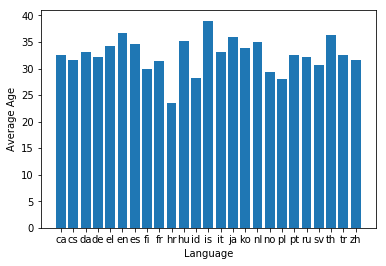

In [276]:
plt.bar(train_users.groupby('language').describe().index,train_users.groupby('language').describe()[('age','mean')])
plt.xlabel('Language')
plt.ylabel('Average Age')

Text(0,0.5,'Signup_flow')

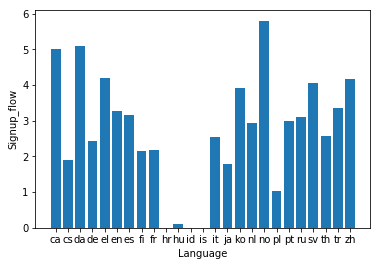

In [277]:
plt.bar(train_users.groupby('language').describe().index,train_users.groupby('language').describe()[('signup_flow','mean')])
plt.xlabel('Language')
plt.ylabel('Signup_flow')

In [278]:
train_users.groupby('first_browser').describe()

age                                                  \
                        count       mean        std   min    25%   50%    75%   
first_browser                                                                   
-unknown-             12007.0  34.195553  10.152760  15.0  27.00  32.0  38.00   
AOL Explorer             98.0  58.969388  12.259609  19.0  52.25  59.5  66.75   
Android Browser         399.0  35.854637  10.380157  18.0  28.00  34.0  41.00   
Apple Mail               23.0  39.304348  13.081683  18.0  30.50  36.0  43.00   
Arora                     0.0        NaN        NaN   NaN    NaN   NaN    NaN   
Avant Browser             4.0  48.250000  13.573872  30.0  42.00  51.5  57.75   
BlackBerry Browser       34.0  36.470588  10.843893  21.0  29.00  34.5  42.50   
Camino                    6.0  43.333333   9.201449  33.0  37.00  41.0  51.00   
Chrome                41301.0  34.270696  10.560307  15.0  27.00  32.0  38.00   
Chrome Mobile           596.0  33.906040   9.769679  18.0  27.00  32.0  38.00   
Chromium                 53.0  34.283019  13.369566  20.0  26.00  31.0  37.00   
CometBird                 1.0  48.000000        NaN  48.0  48.00  48.0  48.00   
Comodo Dragon             1.0  42.000000        NaN  42.0  42.00  42.0  42.00   
Conkeror                  0.0        NaN        NaN   NaN    NaN   NaN    NaN   
CoolNovo                  4.0  25.750000   4.031129  21.0  23.25  26.0  28.50   
Crazy Browser             0.0        NaN        NaN   NaN    NaN   NaN    NaN   
Epic                      0.0        NaN        NaN   NaN    NaN   NaN    NaN   
Firefox               20327.0  38.181434  11.878089  15.0  30.00  35.0  44.00   
Flock                     0.0        NaN        NaN   NaN    NaN   NaN    NaN   
Google Earth              0.0        NaN        NaN   NaN    NaN   NaN    NaN   
Googlebot                 0.0        NaN        NaN   NaN    NaN   NaN    NaN   
IE                    10330.0  41.775799  13.345563  15.0  31.00  39.0  51.00   
IE Mobile                13.0  36.846154  13.777071  22.0  29.00  31.0  39.00   
IceDragon                 0.0        NaN        NaN   NaN    NaN   NaN    NaN   
IceWeasel                10.0  33.400000  10.915840  19.0  27.00  32.5  35.75   
Iron                     12.0  33.750000   8.915003  23.0  28.50  33.0  35.25   
Kindle Browser            1.0  35.000000        NaN  35.0  35.00  35.0  35.00   
Maxthon                  28.0  34.285714  10.259078  23.0  25.75  30.5  39.25   
Mobile Firefox           18.0  42.944444  13.553694  27.0  33.00  38.5  54.50   
Mobile Safari         10214.0  38.039064  12.018872  16.0  29.00  35.0  45.00   
Mozilla                   2.0  31.500000   3.535534  29.0  30.25  31.5  32.75   
NetNewsWire               1.0  44.000000        NaN  44.0  44.00  44.0  44.00   
OmniWeb                   0.0        NaN        NaN   NaN    NaN   NaN    NaN   
Opera                   111.0  35.891892  14.029418  17.0  27.00  31.0  42.00   
Opera Mini                2.0  33.000000   8.485281  27.0  30.00  33.0  36.00   
Opera Mobile              2.0  30.500000   2.121320  29.0  29.75  30.5  31.25   
Outlook 2007              0.0        NaN        NaN   NaN    NaN   NaN    NaN   
PS Vita browser           1.0  32.000000        NaN  32.0  32.00  32.0  32.00   
Pale Moon                 7.0  39.285714  15.702593  21.0  27.50  40.0  48.00   
Palm Pre web browser      0.0        NaN        NaN   NaN    NaN   NaN    NaN   
RockMelt                 21.0  35.952381  11.079152  23.0  28.00  33.0  40.00   
Safari                27313.0  37.320909  11.939070  15.0  29.00  34.0  44.00   
SeaMonkey                 3.0  27.333333   8.326664  18.0  24.00  30.0  32.00   
Silk                     70.0  38.142857  11.665986  18.0  31.00  36.0  45.00   
SiteKiosk                11.0  40.545455  16.524912  25.0  26.50  32.0  55.00   
SlimBrowser               2.0  33.000000  21.213203  18.0  25.50  33.0  40.50   
Sogou Explorer           13.0  26.769231   4.603510  18.0

In [279]:
train_users.groupby('first_device_type').describe()

age                                                 \
                      count       mean        std   min    25%   50%   75%   
first_device_type                                                            
Android Phone        1246.0  34.267255   9.872114  18.0  28.00  32.0  39.0   
Android Tablet        635.0  39.214173  12.476658  18.0  30.00  36.0  46.0   
Desktop (Other)       742.0  34.811321  10.705957  18.0  27.25  32.0  38.0   
Mac Desktop         57173.0  35.992199  11.221909  15.0  28.00  33.0  41.0   
Other/Unknown        3951.0  36.066059  11.179092  16.0  28.00  33.0  41.0   
SmartPhone (Other)     39.0  36.051282  10.862656  21.0  29.00  33.0  40.0   
Windows Desktop     41286.0  37.699801  12.498651  15.0  29.00  34.0  44.0   
iPad                 7542.0  39.935693  12.499303  16.0  31.00  37.0  47.0   
iPhone              10445.0  33.141024   9.250168  15.0  27.00  31.0  37.0   

                          signup_flow                                         \
                      max       count       mean        std  min   25%   50%   
first_device_type                                                              
Android Phone        93.0      2803.0  14.197289  10.153038  0.0   0.0  23.0   
Android Tablet       81.0      1292.0   3.296440   7.582210  0.0   0.0   0.0   
Desktop (Other)      95.0      1199.0   1.121768   4.396104  0.0   0.0   0.0   
Mac Desktop         100.0     89600.0   0.860837   3.640467  0.0   0.0   0.0   
Other/Unknown        99.0     10667.0  10.782694   9.543943  0.0   2.0  12.0   
SmartPhone (Other)   68.0        76.0   5.526316   9.119172  0.0   0.0   0.0   
Windows Desktop     100.0     72716.0   0.720612   3.303540  0.0   0.0   0.0   
iPad                100.0     14339.0   2.218425   6.520384  0.0   0.0   0.0   
iPhone              100.0     20759.0  18.076401   9.802862  0.0  12.0  25.0   

                                
                     75%   max  
first_device_type               
Android Phone       23.0  25.0  
Android Tablet       0.0  25.0  
Desktop (Other)      0.0  25.0  
Mac Desktop          0.0  25.0  
Other/Unknown       23.0  25.0  
SmartPhone (Other)  12.0  25.0  
Windows Desktop      0.0  25.0  
iPad                 0.0  25.0  
iPhone              25.0  25.0

Text(0,0.5,'Signup_flow')

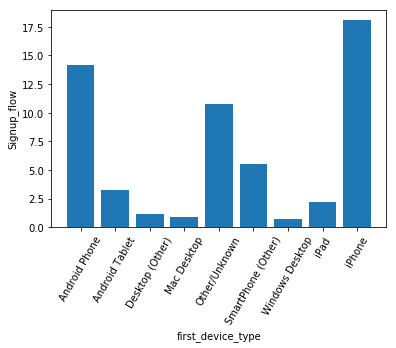

In [280]:
plt.bar(train_users.groupby('first_device_type').describe().index,train_users.groupby('first_device_type').describe()[('signup_flow','mean')])
plt.xlabel('first_device_type')
plt.xticks(rotation=60)
plt.ylabel('Signup_flow')


In [281]:
train_users.groupby('signup_app').describe()

age                                                       \
               count       mean        std   min   25%   50%   75%    max   
signup_app                                                                  
Android       2289.0  33.702490   9.787033  16.0  27.0  31.0  38.0   99.0   
Moweb         2323.0  33.325872   9.345284  18.0  27.0  31.0  37.0   95.0   
Web         108619.0  37.010173  11.884699  15.0  29.0  34.0  43.0  100.0   
iOS           9828.0  33.004782   9.383938  15.0  27.0  31.0  37.0  100.0   

           signup_flow                                                    
                 count       mean       std  min   25%   50%   75%   max  
signup_app                                                                
Android         5454.0  17.750275  5.512600  0.0  12.0  23.0  23.0  24.0  
Moweb           6261.0  18.368312  7.839633  0.0  12.0  24.0  24.0  24.0  
Web           182717.0   0.379543  1.754670  0.0   0.0   0.0   0.0  25.0  
iOS            19019.0  21.886745  5.843743  0.0  25.0  25.0  25.0  25.0

In [282]:
train_users.groupby('affiliate_provider').describe()

age                                                  \
                       count       mean        std   min    25%   50%    75%   
affiliate_provider                                                             
baidu                   15.0  27.600000   6.138869  23.0  24.00  26.0  29.00   
bing                  1182.0  44.731810  14.462541  18.0  32.25  44.0  55.00   
craigslist            2200.0  37.484545  10.232350  18.0  30.00  35.0  43.00   
daum                     0.0        NaN        NaN   NaN    NaN   NaN    NaN   
direct               78884.0  35.803712  11.047099  15.0  28.00  33.0  41.00   
email-marketing         79.0  38.189873  12.970456  18.0  30.00  35.0  44.50   
facebook              1600.0  35.553125  12.728745  18.0  26.00  32.0  42.00   
facebook-open-graph    403.0  39.362283  12.635840  19.0  30.00  37.0  47.00   
google               29108.0  38.806789  13.086703  15.0  29.00  36.0  47.00   
gsp                    184.0  43.184783  13.284141  16.0  33.00  42.0  51.00   
meetup                 136.0  31.970588   6.736238  19.0  27.00  31.0  35.00   
naver                   26.0  33.538462  11.207964  21.0  26.00  29.5  37.25   
other                 8141.0  34.238177  10.106382  16.0  27.00  32.0  38.00   
padmapper              455.0  30.068132   8.002600  18.0  25.00  28.0  32.00   
vast                   382.0  42.445026  12.964149  18.0  32.00  41.0  50.00   
wayn                     2.0  41.500000   9.192388  35.0  38.25  41.5  44.75   
yahoo                  248.0  44.991935  12.887866  21.0  34.00  45.0  54.00   
yandex                  14.0  32.785714   8.468753  19.0  27.00  33.0  34.75   

                           signup_flow                                       \
                       max       count      mean        std  min  25%   50%   
affiliate_provider                                                            
baidu                 46.0        29.0  0.000000   0.000000  0.0  0.0   0.0   
bing                 100.0      2328.0  0.470361   2.562158  0.0  0.0   0.0   
craigslist            95.0      3471.0  1.392682   1.314053  0.0  0.0   2.0   
daum                   NaN         1.0  0.000000        NaN  0.0  0.0   0.0   
direct               100.0    137426.0  4.139748   8.911943  0.0  0.0   0.0   
email-marketing       97.0       166.0  5.222892  10.138661  0.0  0.0   0.0   
facebook              98.0      2273.0  0.544215   3.139355  0.0  0.0   0.0   
facebook-open-graph   96.0       545.0  0.099083   1.295247  0.0  0.0   0.0   
google               100.0     51693.0  0.285996   1.450756  0.0  0.0   0.0   
gsp                   95.0       453.0  0.000000   0.000000  0.0  0.0   0.0   
meetup                65.0       347.0  4.086455   9.041875  0.0  0.0   0.0   
naver                 59.0        52.0  1.384615   5.650451  0.0  0.0   0.0   
other                100.0     12549.0  8.213882   5.498992  0.0  0.0  12.0   
padmapper             94.0       768.0  0.242188   2.365813  0.0  0.0   0.0   
vast                  90.0       829.0  0.984318   2.361833  0.0  0.0   0.0   
wayn                  48.0         8.0  0.000000   0.000000  0.0  0.0   0.0   
yahoo                 91.0       496.0  0.108871   1.533545  0.0  0.0   0.0   
yandex                55.0        17.0  1.470588   6.063391  0.0  0.0   0.0   

                                 
                      75%   max  
affiliate_provider               
baidu                 0.0   0.0  
bing                  0.0  25.0  
craigslist            3.0  16.0  
daum                  0.0   0.0  
direct                0.0  25.0  
email-marketing       0.0  25.0  
facebook              0.0  25.0  
facebook-open-graph   0.0  21.0  
google                0.0  25.0  
gsp                   0.0   0.0  
meetup                0.0  25.0  
naver                 0.0  24.0  
other                12.0  25.0  
padmapper             0.0  24.0  
vast                  2.0  24.0  
wayn                  0.0   0.0  
yahoo                 0.0  24.0  
yand

Text(0,0.5,'Count')

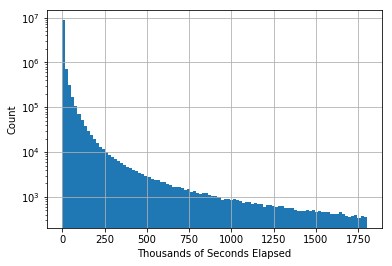

In [283]:
# Histogram of sessions.secs_elapsed.
(sessions.secs_elapsed/1000).hist(bins=100)
plt.yscale('log')
plt.xlabel('Thousands of Seconds Elapsed')
plt.ylabel('Count')

In [284]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [285]:
sessions.groupby(['action_type']).mean()

,secs_elapsed
action_type,
-unknown-,28790.921498
booking_request,49733.959194
booking_response,35626.500000
click,21431.909105
data,7207.314674
message_post,117459.657195
modify,36444.363477
partner_callback,28656.822429
submit,40467.226650


In [286]:
sessions.groupby('device_type').mean()

,secs_elapsed
device_type,
-unknown-,25603.201379
Android App Unknown Phone/Tablet,13342.514479
Android Phone,12435.433043
Blackberry,53828.986258
Chromebook,23592.867280
Linux Desktop,25245.841644
Mac Desktop,19916.708755
Opera Phone,15038.909091
Tablet,16492.685965


In [287]:
sessions.groupby('user_id').count().head()

,action,action_type,action_detail,device_type,secs_elapsed
user_id,,,,,
00023iyk9l,39,37,37,40,39
0010k6l0om,63,48,48,63,62
001wyh0pz8,90,85,85,90,89
0028jgx1x1,31,31,31,31,30
002qnbzfs5,782,712,712,789,788


# Data Analysis

In [288]:
def bs_rep_1d(data, func, ssize):
    """ Bootstrap function. Resamples input data and applies a function (e.g. mean) """
    bs = np.random.choice(data,ssize)
    return func(bs)

def draw_bs_reps(data,func,size,ssize):
    """ Collects many boostrapped samples """
    return np.array([bs_rep_1d(data,func,ssize) for _ in range(size)])

def ecdf(data):
    """Calculate the x,y ECDF of input data"""
    n = len(data)
    x = np.sort(data)
    y = np.array([float(i) for i in range(1,n+1)]) / n
    return x, y

<div class="span5 alert alert-success">
<p> We're interested in predicting how quickly a person will make a booking. So let's make columns that represent the difference in time between when a booking was made and when the account was created (or when they were first active). </p>
</div>

In [289]:
# Create columns representing the time to first booking. 
train_users['time_to_booking'] = train_users['date_first_booking'] - train_users['date_account_created']
train_users['time_to_booking2'] = train_users['date_first_booking'] - train_users['timestamp_first_active']
train_users['days_to_booking'] = (train_users['date_first_booking'] - train_users['date_account_created']).dt.days
train_users['days_to_booking2'] = (train_users['date_first_booking'] - train_users['timestamp_first_active']).dt.days

Text(0.5,0,'Days to booking, from 1st active')

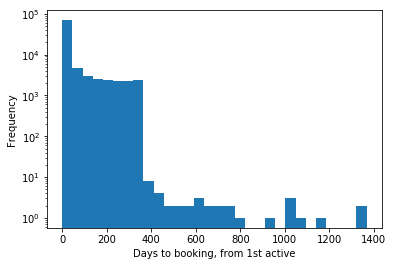

In [290]:
train_users['days_to_booking2'].plot(kind='hist',bins=30)
plt.yscale('log')
plt.xlabel('Days to booking, from 1st active')

Text(0.5,0,'Days to booking, from 1st active')

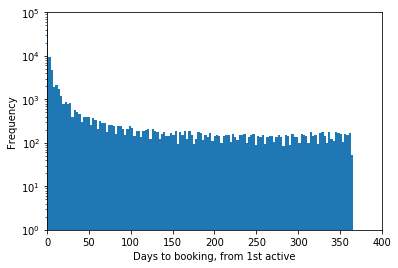

In [291]:
train_users['days_to_booking2'].plot(kind='hist',bins=500)
plt.yscale('log')
plt.axis([0,400,1e0,1e5])
plt.xlabel('Days to booking, from 1st active')

In [292]:
train_users['time_to_booking2'].describe()

count                      88908
mean     44 days 03:51:50.874656
std      88 days 11:28:55.261149
min            -1 days +00:01:17
25%              0 days 00:26:18
50%              2 days 05:52:44
75%      28 days 22:52:50.750000
max           1368 days 06:33:01
Name: time_to_booking2, dtype: object

<div class="span5 alert alert-success">
<p> A large number of people book within the first 2 days (the median). There's also a steep dropoff at 365, which needs to be better understood. Perhaps the threshold for slow vs. fast bookers should be 2 days; that would divide the data into 2 roughly equal-sized groups. </p>
</div>

In [293]:
train_users['slow_bookers'] = train_users['days_to_booking2'] > 2

In [294]:
train_users.groupby('slow_bookers').mean()

,age,signup_flow,days_to_booking,days_to_booking2
slow_bookers,,,,
False,36.833919,3.394493,0.822605,-0.146570
True,35.848027,2.751475,92.568744,92.229303


<div class="span5 alert alert-success">

</p>We'll use the equation below to calculate statistical significance between 2 samples.
 
$$z = \frac{(\bar{x}_M - \bar{x}_F) - 0}{\sqrt{\frac{\sigma_M^2}{n_M} + \frac{\sigma_F^2}{n_F}}}$$

In [295]:
signup_flows = train_users.groupby('slow_bookers').signup_flow.describe()
signup_flows

,count,mean,std,min,25%,50%,75%,max
slow_bookers,,,,,,,,
False,171258.0,3.394493,7.772846,0.0,0.0,0.0,0.0,25.0
True,42193.0,2.751475,7.039254,0.0,0.0,0.0,0.0,25.0


<div class="span5 alert alert-success">
<p> Let's see if there's a statistically significant signup_flow difference between the slow and fast bookers. </p>
</div>

In [296]:
mean_fast_signup = signup_flows.iloc[0,1]
mean_slow_signup = signup_flows.iloc[1,1]
std_fast_signup = signup_flows.iloc[0,2]
std_slow_signup = signup_flows.iloc[1,2]
n_fast_signup = signup_flows.iloc[0,0]
n_slow_signup = signup_flows.iloc[1,0]

In [297]:
# Calculate z value between two groups
z_signup = (mean_fast_signup-mean_slow_signup) / np.sqrt(((std_fast_signup ** 2)/ n_fast_signup) + ((std_slow_signup ** 2)/ n_slow_signup))
z_signup

16.454248574655058

<div class="span5 alert alert-success">
<p> Let's see if there's an age difference between the slow and fast bookers. </p>
</div>

In [298]:
ages = train_users.groupby('slow_bookers').age.describe()
ages

,count,mean,std,min,25%,50%,75%,max
slow_bookers,,,,,,,,
False,88770.0,36.833919,11.981443,15.0,28.0,34.0,43.0,100.0
True,34289.0,35.848027,10.869661,15.0,28.0,33.0,41.0,100.0


In [299]:
mean_fast = ages.iloc[0,1]
mean_slow = ages.iloc[1,1]
std_fast = ages.iloc[0,2]
std_slow = ages.iloc[1,2]
n_fast = ages.iloc[0,0]
n_slow = ages.iloc[1,0]

In [300]:
# Calculate z value between two groups
z = (mean_fast-mean_slow) / np.sqrt(((std_fast ** 2)/ n_fast) + ((std_slow ** 2)/ n_slow))
z

13.855801494383012

<div class="span5 alert alert-success">
<p> The z value for the difference in age between the slow bookers and fast bookers is 13.9, which means the difference is statistically significant and likely isn't due to chance. </p>
</div>

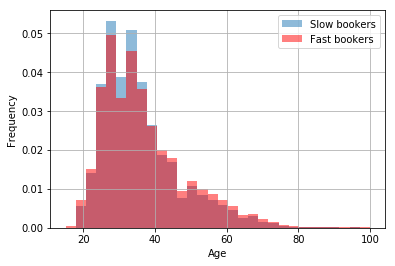

In [301]:
# Plot a histogram of the age.
train_users[train_users['slow_bookers']==True]['age'].hist(alpha=0.5,density=True,bins=30)
train_users[train_users['slow_bookers']==False]['age'].hist(alpha=0.5,color='red',density=True,bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Slow bookers','Fast bookers'])

In [302]:
slows = train_users[(train_users['slow_bookers']==True)]
fasts = train_users[train_users['slow_bookers']==False]
slowx,slowy=ecdf(slows['age'])
fastx,fasty=ecdf(fasts['age'])

In [303]:
slows2 = slows[~slows['age'].isna()]
fasts2 = fasts[~fasts['age'].isna()]
slowx2,slowy2=ecdf(slows2['age'])
fastx2,fasty2=ecdf(fasts2['age'])

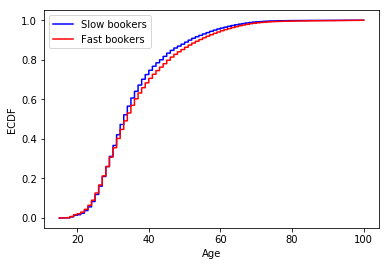

In [304]:
plt.plot(slowx2,slowy2,color='blue')
plt.plot(fastx2,fasty2,color='red')
plt.xlabel('Age')
plt.ylabel('ECDF')
plt.legend(['Slow bookers','Fast bookers'])

[0, 100, 0, 400]

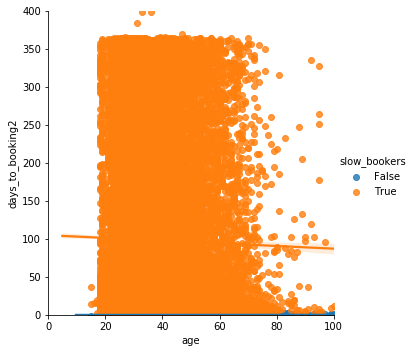

In [305]:
sns.lmplot(x='age',y='days_to_booking2',data=train_users,hue='slow_bookers')
plt.axis([0,100,0,400])

<div class="span5 alert alert-success">
<p> Let's make some violin plots to assess the data further. </p>
</div>

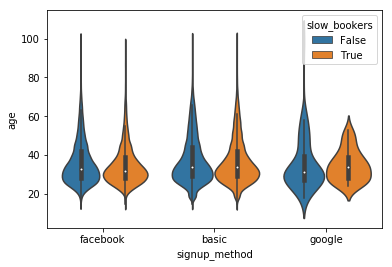

In [306]:
sns.violinplot(x='signup_method',y='age',data=train_users,hue='slow_bookers')

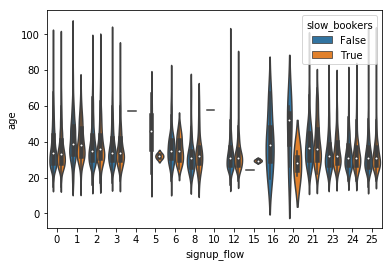

In [307]:
sns.violinplot(x='signup_flow',y='age',data=train_users,hue='slow_bookers')

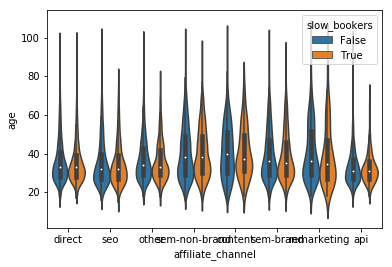

In [308]:
sns.violinplot(x='affiliate_channel',y='age',data=train_users,hue='slow_bookers')

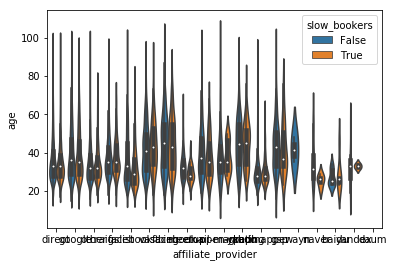

In [309]:
sns.violinplot(x='affiliate_provider',y='age',data=train_users,hue='slow_bookers')

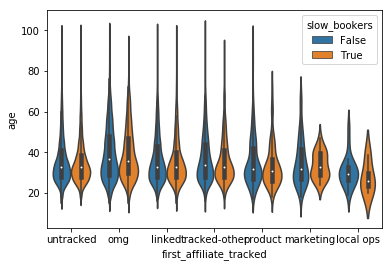

In [310]:
sns.violinplot(x='first_affiliate_tracked',y='age',data=train_users,hue='slow_bookers')

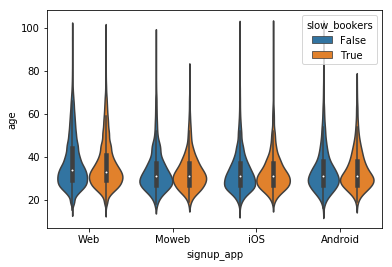

In [311]:
sns.violinplot(x='signup_app',y='age',data=train_users,hue='slow_bookers')

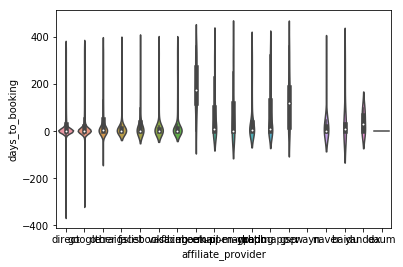

In [312]:
sns.violinplot(x='affiliate_provider',y='days_to_booking',data=train_users)

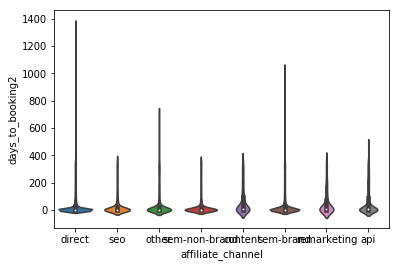

In [313]:
sns.violinplot(x='affiliate_channel',y='days_to_booking2',data=train_users)

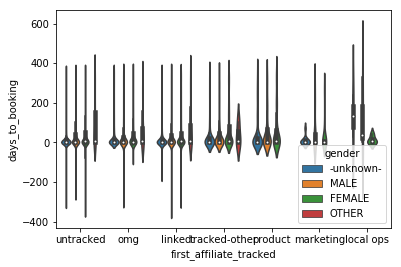

In [314]:
sns.violinplot(x='first_affiliate_tracked',y='days_to_booking',data=train_users,hue='gender')

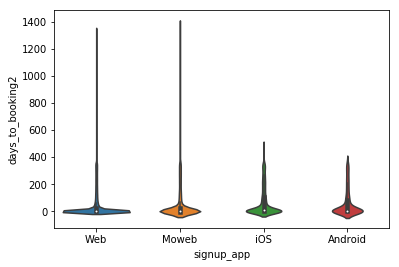

In [315]:
sns.violinplot(x='signup_app',y='days_to_booking2',data=train_users)

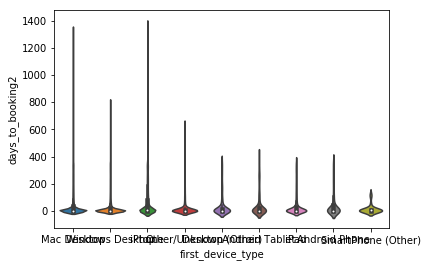

In [316]:
sns.violinplot(x='first_device_type',y='days_to_booking2',data=train_users)

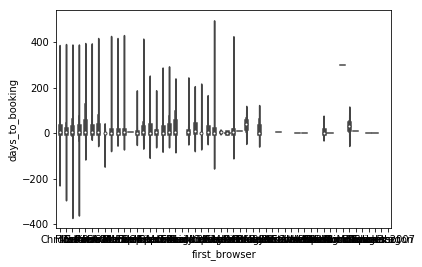

In [317]:
sns.violinplot(x='first_browser',y='days_to_booking',data=train_users)

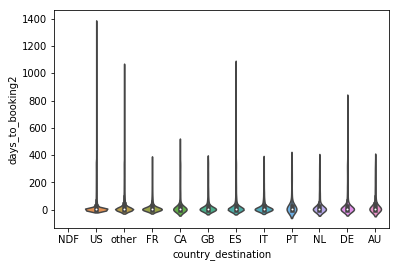

In [318]:
sns.violinplot(x='country_destination',y='days_to_booking2',data=train_users)

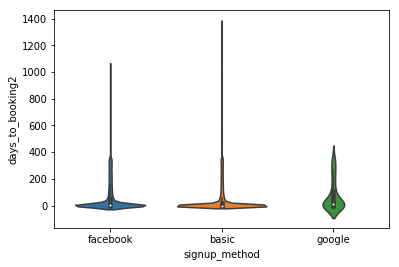

In [319]:
sns.violinplot(x='signup_method',y='days_to_booking2',data=train_users)

<div class="span5 alert alert-success">
<p> Let's look at who made a booking BEFORE creating an account. </p>
</div>

In [320]:
train_users[train_users['date_first_booking'] < train_users['date_account_created']].head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,time_to_booking,time_to_booking2,days_to_booking,days_to_booking2,slow_bookers
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,untracked,Web,Windows Desktop,IE,US,-57 days,418 days 00:47:13,-57.0,418.0,True
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,untracked,Web,Mac Desktop,Chrome,US,-208 days,71 days 17:48:55,-208.0,71.0,True
120,swrvyedlsp,2010-05-30,2010-02-18 00:41:09,2010-03-17,FEMALE,NaN,facebook,0,en,direct,...,omg,Web,Mac Desktop,Safari,US,-74 days,26 days 23:18:51,-74.0,26.0,True
357,adq42kzmnv,2010-12-23,2010-04-05 15:35:24,2010-04-06,MALE,38.0,basic,2,en,direct,...,untracked,Web,Mac Desktop,Firefox,US,-261 days,0 days 08:24:36,-261.0,0.0,False
365,176898y1ju,2011-03-28,2010-04-06 19:02:10,2010-04-15,FEMALE,44.0,basic,0,en,direct,...,untracked,Web,Mac Desktop,Firefox,US,-347 days,8 days 04:57:50,-347.0,8.0,True


In [321]:
#sns.violinplot(x='device_type',y='secs_elapsed',data=sessions)

<div class="span5 alert alert-success">
<p> Let's assess the Sessions table. </p>
</div>

In [322]:
useractions = sessions.groupby('user_id').count()
useractions.head()

,action,action_type,action_detail,device_type,secs_elapsed
user_id,,,,,
00023iyk9l,39,37,37,40,39
0010k6l0om,63,48,48,63,62
001wyh0pz8,90,85,85,90,89
0028jgx1x1,31,31,31,31,30
002qnbzfs5,782,712,712,789,788


In [323]:
# Isolate each user's different action types.
useractions2 = sessions.groupby(['user_id','action']).count()
useractions2.head()

action_type  action_detail  device_type  \
user_id    action                                                           
00023iyk9l ajax_refresh_subtotal            2              2            2   
           callback                         1              1            1   
           confirm_email                    1              1            1   
           dashboard                        4              4            4   
           header_userpic                   2              2            2   

                                  secs_elapsed  
user_id    action                               
00023iyk9l ajax_refresh_subtotal             2  
           callback                          0  
           confirm_email                     1  
           dashboard                         4  
           header_userpic                    2

<div class="span5 alert alert-success">
<p> Let's merge the grouped Sessions table with the train_users table. </p>
</div>

In [324]:
train_users_sessions = pd.merge(train_users,useractions,left_on='id',right_on = 'user_id',how='right')

In [325]:
train_users_sessions.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,time_to_booking,time_to_booking2,days_to_booking,days_to_booking2,slow_bookers,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,2014-01-01,2014-01-01 00:09:36,2014-01-04,MALE,62.0,basic,0.0,en,sem-non-brand,...,3 days,2 days 23:50:24,3.0,2.0,False,126,90,90,127,126
1,yo8nz8bqcq,2014-01-01,2014-01-01 00:15:58,NaT,-unknown-,NaN,basic,0.0,en,direct,...,NaT,NaT,NaN,NaN,False,9,8,8,9,8
2,4grx6yxeby,2014-01-01,2014-01-01 00:16:39,NaT,-unknown-,NaN,basic,0.0,en,sem-brand,...,NaT,NaT,NaN,NaN,False,15,16,16,16,15
3,ncf87guaf0,2014-01-01,2014-01-01 00:21:46,NaT,-unknown-,NaN,basic,0.0,en,direct,...,NaT,NaT,NaN,NaN,False,152,125,125,152,151
4,4rvqpxoh3h,2014-01-01,2014-01-01 00:26:19,2014-01-02,-unknown-,NaN,basic,25.0,en,direct,...,1 days,0 days 23:33:41,1.0,0.0,False,8,8,8,8,7


In [326]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [327]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 21 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
gender                     213451 non-null object
age                        123059 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
time_to_booking            88908 non-null timedelta64[ns]
time_to_

In [328]:
train_users_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135483 entries, 0 to 135482
Data columns (total 26 columns):
id                         73815 non-null object
date_account_created       73815 non-null datetime64[ns]
timestamp_first_active     73815 non-null datetime64[ns]
date_first_booking         28774 non-null datetime64[ns]
gender                     73815 non-null object
age                        40844 non-null float64
signup_method              73815 non-null object
signup_flow                73815 non-null float64
language                   73815 non-null object
affiliate_channel          73815 non-null object
affiliate_provider         73815 non-null object
first_affiliate_tracked    73513 non-null object
signup_app                 73815 non-null object
first_device_type          73815 non-null object
first_browser              73815 non-null object
country_destination        73815 non-null object
time_to_booking            28774 non-null timedelta64[ns]
time_to_booking2     

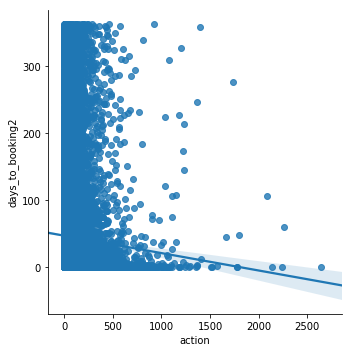

In [329]:
sns.lmplot(x='action',y='days_to_booking2',data=train_users_sessions)

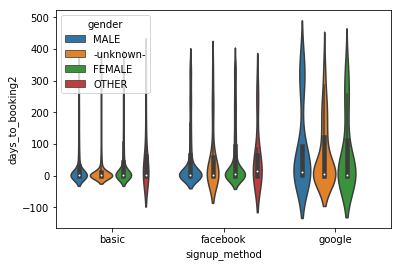

In [330]:
sns.violinplot(x='signup_method',y='days_to_booking2',data=train_users_sessions,hue='gender')

In [331]:
train_users_sessions.signup_app.value_counts()

Web        57016
iOS        10410
Android     3779
Moweb       2610
Name: signup_app, dtype: int64

In [332]:
train_users_sessions.signup_flow.value_counts()

0.0     57088
25.0     8344
12.0     3942
23.0     2162
24.0     2160
8.0       116
21.0        3
Name: signup_flow, dtype: int64

In [333]:
train_users_sessions.signup_method.value_counts()

basic       55135
facebook    18136
google        544
Name: signup_method, dtype: int64

In [334]:
train_users_sessions.language.value_counts().head()

en    71100
zh      726
ko      386
fr      372
es      349
Name: language, dtype: int64

In [335]:
train_users_sessions.age.value_counts().head()

27.0    2150
28.0    2146
29.0    2049
30.0    2026
26.0    2026
Name: age, dtype: int64

In [336]:
train_users_sessions.gender.value_counts()

-unknown-    37788
FEMALE       19105
MALE         16853
OTHER           69
Name: gender, dtype: int64

In [337]:
train_users_sessions.first_affiliate_tracked.value_counts()

untracked        39049
omg              18342
linked           14316
tracked-other      938
product            733
marketing          110
local ops           25
Name: first_affiliate_tracked, dtype: int64

In [338]:
train_users_sessions.first_browser.value_counts().head(10)

Chrome             22662
Safari             14170
-unknown-          12271
Firefox             9081
Mobile Safari       7885
IE                  6355
Chrome Mobile        799
Android Browser      299
Opera                 60
Silk                  48
Name: first_browser, dtype: int64

In [339]:
train_users_sessions.first_device_type.value_counts().head(10)

Mac Desktop           28029
Windows Desktop       23395
iPhone                10961
iPad                   5238
Other/Unknown          2993
Android Phone          1979
Android Tablet          701
Desktop (Other)         489
SmartPhone (Other)       30
Name: first_device_type, dtype: int64

In [340]:
train_users_sessions.groupby('slow_bookers').mean()

,age,signup_flow,days_to_booking,days_to_booking2,action,action_type,action_detail,device_type,secs_elapsed
slow_bookers,,,,,,,,,
False,35.408312,5.005443,0.794021,-0.205979,72.189393,64.963160,64.963160,72.886892,71.886892
True,34.699173,4.192711,95.219345,94.219345,83.829128,74.026265,74.026265,84.530028,83.530028


In [341]:
train_users_sessions.slow_bookers.value_counts()

False    60261
True     13554
Name: slow_bookers, dtype: int64

In [342]:
for i in range(0,9):
    tmp_m1 = train_users_sessions.groupby('slow_bookers').mean().iloc[0,i]
    tmp_m2 = train_users_sessions.groupby('slow_bookers').mean().iloc[1,i]
    tmp_s1 = train_users_sessions.groupby('slow_bookers').std().iloc[0,i]
    tmp_s2 = train_users_sessions.groupby('slow_bookers').std().iloc[1,i]
    tmp_n1 = train_users_sessions.groupby('slow_bookers').count().iloc[0,i]
    tmp_n2 = train_users_sessions.groupby('slow_bookers').count().iloc[1,i]
    z = (tmp_m1-tmp_m2) / np.sqrt(((tmp_s1 ** 2)/ tmp_n1) + ((tmp_s2 ** 2)/ tmp_n2))
    print(train_users_sessions.groupby('slow_bookers').mean().columns[i],z)

('age', 6.686366530794994)
('signup_flow', 9.562603883925538)
('days_to_booking', -101.81025477323277)
('days_to_booking2', -101.80766065505647)
('action', -10.268083812957997)
('action_type', -7.853889745418361)
('action_detail', -9.087667627463171)
('device_type', -10.22940126785538)
('secs_elapsed', -10.229401267855378)


<div class="span5 alert alert-success">
<p> It appears as if all the difference between the slow and fast bookers for all of these columns are statistically significant. </p>
</div>